## Lecture 4: Convexity



In [53]:
## MP 573 Part 2, Lecture 4: Convexity
##
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
from scipy import signal
import scipy.io as sio
import scipy.optimize as opt
import numpy.random as rnd

font = {'weight' : 'normal',
        'size'   : 20}

In [94]:
# Some functions to optimize (one convex, one non-convex)
def function1(x,chooseFunction):
       
    if chooseFunction == 0:    
        # Calculate f = ( x - a )^2
        f = (x-3)**2
    
    else:
        # Calculate f = sin(2 pi x) + 1 + x^2
        f = 5*np.sin(2*np.pi*(x/2)) + (x-3)**2
      
    return f

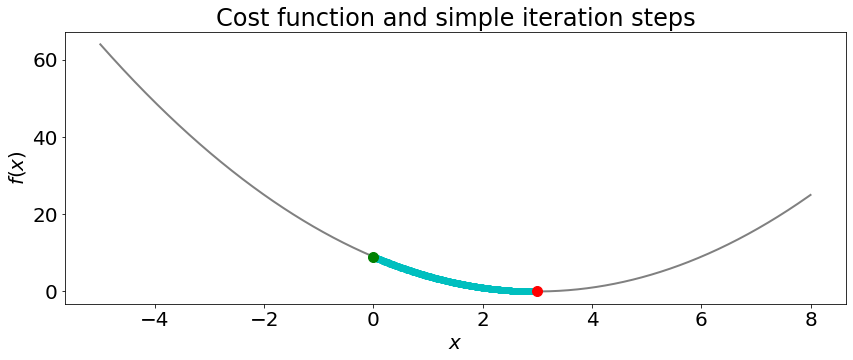

In [96]:
# Try optimizing a function defined above, with some initial guess
x0 = 0; # Initial guess
step = 0.01; # Step size (in this simple algorithm, we take descent steps of fixed size until we cannot descend anymore)
chooseFunction = 0; # Choice of function as described in previous cell
xest = x0;
fest = function1(xest,chooseFunction)
allx = xest
allf = fest
DONE = False;
while DONE == False: # Iterate until we can no longer descend
    xtryL = xest - step;
    xtryR = xest + step;
    ftryL = function1(xtryL,chooseFunction)      
    ftryR = function1(xtryR,chooseFunction)  
    if (ftryR < fest) & (ftryR < ftryL): # Test if we should move to the right
        xest = xtryR
        fest = ftryR
        allx = np.append(allx,xest)
        allf = np.append(allf,fest)
    elif ftryL < fest: # Otherwise, test if we should move to the left
        xest = xtryL
        fest = ftryL
        allx = np.append(allx,xest)
        allf = np.append(allf,fest)
    else: # If neither direction of motion decreases our function, this algorithm is done
        DONE = True
        
# Finally, plot the overall function (in grey) and our "path" (from green to red, path in cyan)        
xgrid = np.linspace(np.min(allx)-5,np.max(allx)+5,1001)
fgrid = function1(xgrid,chooseFunction)
plt.figure(figsize=(14,5))
plt.rc('font', **font)
plt.plot(xgrid,fgrid,'0.5',linewidth=2)
plt.plot(allx,allf,'oc',markersize=6)
plt.plot(allx[0],allf[0],'og',markersize=10)
plt.plot(allx[-1],allf[-1],'or',markersize=10)
plt.xlabel('$x$')
plt.ylabel('$f(x)$');
plt.title('Cost function and simple iteration steps');
        

## Q1: Preserving convexity

Suppose that the functions $f_1(\mathbf{x})$ and $f_2(\mathbf{x})$ are convex. Which of the following related functions are guaranteed to be convex too? 

A. Their sum: $g(\mathbf{x}) = f_1(\mathbf{x}) + f_2(\mathbf{x})$

B. Their difference: $g(\mathbf{x}) = f_1(\mathbf{x}) - f_2(\mathbf{x})$

C. Their product: $g(\mathbf{x}) = f_1(\mathbf{x}) \cdot f_2(\mathbf{x})$

D. Their maximum: $g(\mathbf{x}) = max(f_1(\mathbf{x}) , f_2(\mathbf{x}))$

E. Their minimum: $g(\mathbf{x}) = min(f_1(\mathbf{x}) , f_2(\mathbf{x}))$

F. The function  $g(x) = f_1(\mathbf{A}x)$ where $x$ is now a scalar and $\mathbf{A}$ is a fixed matrix of size $N \times 1$ with values $A_{n,1} = 1$ for $n=1,\ldots,N$.